# EDA On Indian Car info 
This dataset contains a large amount of data's.

### SECTION 1: LOAD REQUIRED LIBRARY...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Section 2: Load the dataset and view it

In [2]:
df = pd.read_csv(r"C:\Projects\Prep_Insta_repo\Week 6\Indian Cars (To solve)\cars_ds_final.csv")

In [3]:
df.head()

Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration  ... Leather_Wrapped_Steering Automatic_Headlamps  \
0                In-line  ...                      NaN                 NaN   
1                In-line  ...                      NaN                 NaN   
2                In-line  ...                      NaN                 NaN   
3                In-line  ...                      NaN                 NaN   
4                In-line  ...                      NaN                 NaN   

  Engine_Type ASR_/_Traction_Control Cruise_Control USB_Ports  \
0         NaN                    NaN            NaN       NaN   
1         NaN                    NaN            NaN       NaN   
2         NaN                    NaN            NaN       NaN   
3         NaN                    NaN            NaN       NaN   
4         NaN                    NaN            NaN       NaN   

  Heads-Up_Display Welcome_Lights Battery  Electric_Range  
0              NaN            NaN     NaN             NaN  
1              NaN            NaN     NaN             NaN  
2              NaN            NaN     NaN             NaN  
3              NaN            NaN     NaN             NaN  
4              NaN            NaN     NaN             NaN  

[5 rows x 141 columns]

### Section 3: Data Exploration and Data preprocessing

In [4]:
# Shape of the dataset
df.shape

(1276, 141)

In [5]:
df.columns.tolist()

['Unnamed: 0',
 'Make',
 'Model',
 'Variant',
 'Ex-Showroom_Price',
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Drivetrain',
 'Cylinder_Configuration',
 'Emission_Norm',
 'Engine_Location',
 'Fuel_System',
 'Fuel_Tank_Capacity',
 'Fuel_Type',
 'Height',
 'Length',
 'Width',
 'Body_Type',
 'Doors',
 'City_Mileage',
 'Highway_Mileage',
 'ARAI_Certified_Mileage',
 'ARAI_Certified_Mileage_for_CNG',
 'Kerb_Weight',
 'Gears',
 'Ground_Clearance',
 'Front_Brakes',
 'Rear_Brakes',
 'Front_Suspension',
 'Rear_Suspension',
 'Front_Track',
 'Rear_Track',
 'Front_Tyre_&_Rim',
 'Rear_Tyre_&_Rim',
 'Power_Steering',
 'Power_Windows',
 'Power_Seats',
 'Keyless_Entry',
 'Power',
 'Torque',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Seating_Capacity',
 'Seats_Material',
 'Type',
 'Wheelbase',
 'Wheels_Size',
 'Start_/_Stop_Button',
 '12v_Power_Outlet',
 'Audiosystem',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Basic_Warranty',
 'Bluetooth',
 'Boot-lid_Opener',

In [6]:
df.isna().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [7]:
# Checking for duplicates
duplicates = df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [Unnamed: 0, Make, Model, Variant, Ex-Showroom_Price, Displacement, Cylinders, Valves_Per_Cylinder, Drivetrain, Cylinder_Configuration, Emission_Norm, Engine_Location, Fuel_System, Fuel_Tank_Capacity, Fuel_Type, Height, Length, Width, Body_Type, Doors, City_Mileage, Highway_Mileage, ARAI_Certified_Mileage, ARAI_Certified_Mileage_for_CNG, Kerb_Weight, Gears, Ground_Clearance, Front_Brakes, Rear_Brakes, Front_Suspension, Rear_Suspension, Front_Track, Rear_Track, Front_Tyre_&_Rim, Rear_Tyre_&_Rim, Power_Steering, Power_Windows, Power_Seats, Keyless_Entry, Power, Torque, Odometer, Speedometer, Tachometer, Tripmeter, Seating_Capacity, Seats_Material, Type, Wheelbase, Wheels_Size, Start_/_Stop_Button, 12v_Power_Outlet, Audiosystem, Aux-in_Compatibility, Average_Fuel_Consumption, Basic_Warranty, Bluetooth, Boot-lid_Opener, Boot_Space, CD_/_MP3_/_DVD_Player, Central_Locking, Child_Safety_Locks, Clock, Cup_Holders, Distance_to_Empty, Door_Pockets, Engine_Malfunction_Light, Extended_Warranty, FM_Radio, Fuel-lid_Opener, Fuel_Gauge, Handbrake, Instrument_Console, Low_Fuel_Warning, Minimum_Turning_Radius, Multifunction_Display, Sun_Visor, Third_Row_AC_Vents, Ventilation_System, Auto-Dimming_Rear-View_Mirror, Hill_Assist, Gear_Indicator, 3_Point_Seat-Belt_in_Middle_Rear_Seat, Ambient_Lightning, Cargo/Boot_Lights, Drive_Modes, Engine_Immobilizer, High_Speed_Alert_System, Lane_Watch_Camera/_Side_Mirror_Camera, Passenger_Side_Seat-Belt_Reminder, Seat_Back_Pockets, Voice_Recognition, Walk_Away_Auto_Car_Lock, ABS_(Anti-lock_Braking_System), Headlight_Reminder, Adjustable_Headrests, Gross_Vehicle_Weight, Airbags, Door_Ajar_Warning, EBD_(Electronic_Brake-force_Distribution), ...]
Index: []

[0 rows x 141 columns]

So there are no duplicate values in the dataset

**Let's drop the first column it useless**

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

**Let's check the percentage of the missing value in each columns**

In [9]:
total_rows = df.shape[0]
for col in df.columns:
    if df[col].isna().sum() > 0 :
        print(col,'-',round((df[col].isna().sum()/total_rows)*100,2))

Make - 5.88
Displacement - 0.94
Cylinders - 5.17
Valves_Per_Cylinder - 7.99
Drivetrain - 0.55
Cylinder_Configuration - 1.02
Emission_Norm - 0.86
Engine_Location - 3.37
Fuel_System - 0.63
Fuel_Tank_Capacity - 5.41
Height - 0.08
Width - 0.94
Body_Type - 0.47
Doors - 0.31
City_Mileage - 43.5
Highway_Mileage - 62.7
ARAI_Certified_Mileage - 8.93
ARAI_Certified_Mileage_for_CNG - 97.88
Kerb_Weight - 28.61
Gears - 8.23
Ground_Clearance - 22.65
Front_Brakes - 1.96
Rear_Brakes - 1.96
Front_Suspension - 4.62
Rear_Suspension - 3.61
Front_Track - 52.27
Rear_Track - 52.98
Front_Tyre_&_Rim - 3.84
Rear_Tyre_&_Rim - 3.76
Power_Steering - 4.47
Power_Windows - 7.6
Power_Seats - 69.98
Keyless_Entry - 21.47
Torque - 0.16
Odometer - 3.37
Speedometer - 3.53
Tachometer - 1.02
Tripmeter - 4.7
Seating_Capacity - 0.47
Seats_Material - 0.94
Type - 0.08
Wheelbase - 1.57
Wheels_Size - 4.39
Start_/_Stop_Button - 53.13
12v_Power_Outlet - 12.07
Audiosystem - 3.45
Aux-in_Compatibility - 22.26
Average_Fuel_Consumption -

(1) Lets Analyze the column one by one. First we consider the `Make` Column

In [10]:
df['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [11]:
df[df['Make'].isna()]   

Make                    Model                  Variant Ex-Showroom_Price  \
252   NaN    Mercedes-Benz B-Class              B 180 Sport     Rs. 29,88,311   
253   NaN    Mercedes-Benz B-Class          B 200 Cdi Sport     Rs. 30,89,851   
254   NaN    Mercedes-Benz B-Class      B 180 Night Edition     Rs. 31,98,662   
255   NaN    Mercedes-Benz B-Class  B 200 Cdi Night Edition     Rs. 33,03,282   
256   NaN  Mercedes-Benz Cla-Class                200 Sport     Rs. 35,99,000   
...   ...                      ...                      ...               ...   
1151  NaN  Mercedes-Benz Gla-Class          45 Aero Edition     Rs. 80,67,000   
1219  NaN      Rolls-Royce Phantom                    Sedan   Rs. 9,50,00,000   
1220  NaN      Rolls-Royce Phantom                      Ewb   Rs. 7,54,00,000   
1251  NaN        Mercedes-Benz Glc          200 Progressive     Rs. 52,75,000   
1252  NaN        Mercedes-Benz Glc  220D 4Matic Progressive     Rs. 57,75,000   

     Displacement  Cylinders  Valves_Per_Cylinder               Drivetrain  \
252       1595 cc        4.0                  4.0  FWD (Front Wheel Drive)   
253       2143 cc        4.0                  4.0  FWD (Front Wheel Drive)   
254       1595 cc        4.0                  4.0  FWD (Front Wheel Drive)   
255       2143 cc        4.0                  4.0  FWD (Front Wheel Drive)   
256       1991 cc        4.0                  4.0  FWD (Front Wheel Drive)   
...           ...        ...                  ...                      ...   
1151      1991 cc        4.0                  4.0                      4WD   
1219      6749 cc       12.0                  4.0   RWD (Rear Wheel Drive)   
1220      6749 cc       12.0                  4.0   RWD (Rear Wheel Drive)   
1251      1991 cc        4.0                  4.0   RWD (Rear Wheel Drive)   
1252      1950 cc        4.0                  4.0    AWD (All Wheel Drive)   

     Cylinder_Configuration Emission_Norm  ... Leather_Wrapped_Steering  \
252                 In-line         BS IV  ...                      Yes   
253                 In-line         BS IV  ...                      Yes   
254                 In-line         BS IV  ...                      Yes   
255                 In-line         BS IV  ...                      Yes   
256                 In-line         BS IV  ...                      Yes   
...                     ...           ...  ...                      ...   
1151                In-line         BS IV  ...                      Yes   
1219                      V         BS IV  ...                      Yes   
1220                      V         BS IV  ...                      Yes   
1251                In-line          BS 6  ...                      Yes   
1252                In-line          BS 6  ...                      Yes   

     Automatic_Headlamps Engine_Type ASR_/_Traction_Control Cruise_Control  \
252                  Yes         NaN                    Yes            Yes   
253                  Yes         NaN                    Yes            Yes   
254                  Yes         NaN                    Yes            Yes   
255                  Yes         NaN                    Yes            Yes   
256                  Yes         NaN                    Yes            Yes   
...                  ...         ...                    ...            ...   
1151                 Yes         NaN                    Yes            Yes   
1219                 Yes         NaN                    Yes            Yes   
1220                 Yes         NaN                    Yes            Yes   
1251                 Yes         NaN                    Yes            Yes   
1252                 Yes         NaN                    Yes            Yes   

     USB_Ports Heads-Up_Display Welcome_Lights  Battery Electric_Range  
252        NaN              NaN            NaN      NaN            NaN  
253        NaN              NaN            NaN      NaN            NaN  
254        NaN              NaN       

In [12]:
def fill_make(row):
    if row['Model'] == 'Go+':
        return 'Datsun'
    else:
        # Extract car brand from the Model column (assumes brand is first part of Model)
        return row['Model'].split()[0]

In [13]:
df['Make'] = df.apply(lambda row: fill_make(row) if pd.isna(row['Make']) else row['Make'], axis=1)

**Let's convert an Ex Showroom Price into a numeric type**

In [14]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].apply(lambda row: int(re.sub(r'\D','',row)))

(2) Let's check the Displacement column

In [15]:
df['Displacement']

0        624 cc
1        624 cc
2        624 cc
3        624 cc
4        624 cc
         ...   
1271    1498 cc
1272    1498 cc
1273    1497 cc
1274    1497 cc
1275    3200 cc
Name: Displacement, Length: 1276, dtype: object

In [16]:
df[df['Displacement'].isna()]

Make                              Model       Variant  \
615        Mahindra                           E2O Plus            P4   
616        Mahindra                           E2O Plus            P6   
617            Tata                           Tigor Ev           Xm+   
618            Tata                           Tigor Ev           Xt+   
619            Tata                           Tigor Ev           Xe+   
745              Mg                              Zs Ev        Excite   
746              Mg                              Zs Ev     Exclusive   
862   Mercedes-Benz  Mercedes-Benz Amg Gt 4-Door Coupe  63 S 4Matic+   
1006           Tata                           Nexon Ev            Xm   
1007           Tata                           Nexon Ev       Xz Plus   
1008           Tata                           Nexon Ev   Xz Plus Lux   
1205        Hyundai                      Kona Electric       Premium   

      Ex-Showroom_Price Displacement  Cylinders  Valves_Per_Cylinder  \
615              881425          NaN        NaN                  NaN   
616              957177          NaN        NaN                  NaN   
617              960868          NaN        NaN                  NaN   
618              975868          NaN        NaN                  NaN   
619              944175          NaN        NaN                  NaN   
745             2088000          NaN        NaN                  NaN   
746             2358000          NaN        NaN                  NaN   
862            24200000          NaN        8.0                  6.0   
1006            1399000          NaN        NaN                  NaN   
1007            1499000          NaN        NaN                  NaN   
1008            1599000          NaN        NaN                  NaN   
1205            2371858          NaN        NaN                  NaN   

                   Drivetrain Cylinder_Configuration Emission_Norm  ...  \
615    RWD (Rear Wheel Drive)                In-line         BS IV  ...   
616    RWD (Rear Wheel Drive)                In-line         BS IV  ...   
617   FWD (Front Wheel Drive)                    NaN         BS VI  ...   
618   FWD (Front Wheel Drive)                    NaN         BS VI  ...   
619   FWD (Front Wheel Drive)                    NaN         BS VI  ...   
745    RWD (Rear Wheel Drive)                In-line          BS 6  ...   
746    RWD (Rear Wheel Drive)                In-line          BS 6  ...   
862     AWD (All Wheel Drive)                      V          BS 6  ...   
1006  FWD (Front Wheel Drive)                In-line         BS VI  ...   
1007  FWD (Front Wheel Drive)                In-line         BS VI  ...   
1008  FWD (Front Wheel Drive)                In-line         BS VI  ...   
1205  FWD (Front Wheel Drive)                    NaN           NaN  ...   

     Leather_Wrapped_Steering Automatic_Headlamps     Engine_Type  \
615                       NaN                 NaN             NaN   
616                       NaN                 NaN             NaN   
617                       NaN                 NaN     M1 Category   
618                       NaN                 NaN     M1 Category   
619                       NaN                 NaN     M1 Category   
745                       Yes                 Yes             NaN   
746                       Yes                 Yes             NaN   
862                       NaN                 NaN  Biturbo engine   
1006                      NaN                 NaN             NaN   
1007                      NaN                 NaN             NaN   
1008                      NaN                 Yes             NaN   
1205                      Yes                 Yes             NaN   

     ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display  \
615                     NaN            NaN       NaN              NaN   
616                     NaN            NaN       NaN              NaN   
617                     NaN            NaN      

In [17]:
model_displacement = {
    'E2O Plus': '0 cc',
    'Tigor Ev': '0 cc',
    'Zs Ev': '0 cc',
    'Mercedes-Benz Amg Gt 4-Door Coupe' : '3982 cc',
    'Nexon Ev' : '0 cc',
    'Kona Electric' : '0 cc'
}

In [18]:
cars = set(model_displacement.keys())

In [19]:
df['Displacement'] = df.apply(lambda row: model_displacement.get(row['Model'],row['Displacement']) if row['Model'] in cars else row['Displacement'], axis=1)

Convertion of an object into int

In [20]:
df['Displacement'] = df['Displacement'].apply(lambda row: int(re.sub(r'\D','',row)))

(3) Let's handle the missing value of Drivetrain column

In [21]:
df.Drivetrain.unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD', nan], dtype=object)

In [22]:
df[df.Drivetrain.isna()]

Make                            Model            Variant  \
272            Mini                          Clubman           Cooper S   
303   Mercedes-Benz  Mercedes-Benz E-Class Cabriolet               E400   
503            Tata                            Nexon                 Xe   
843        Maserati                           Ghibli             Diesel   
844        Maserati                           Ghibli          Gransport   
845        Maserati                           Ghibli          Granlusso   
1162         Jaguar                           F-Type  5.0 Convertible R   

      Ex-Showroom_Price  Displacement  Cylinders  Valves_Per_Cylinder  \
272             4120000          1998        4.0                  4.0   
303             7711338          2996        6.0                  4.0   
503              695000          1198        3.0                  4.0   
843            13387856          2987        NaN                  NaN   
844            13881858          2987        NaN                  NaN   
845            14247814          2987        NaN                  NaN   
1162           23659454          5000        NaN                  NaN   

     Drivetrain Cylinder_Configuration Emission_Norm  ...  \
272         NaN                In-line         BS IV  ...   
303         NaN                      V         BS IV  ...   
503         NaN                In-line          BS 6  ...   
843         NaN                      V         BS IV  ...   
844         NaN                      V         BS IV  ...   
845         NaN                      V         BS IV  ...   
1162        NaN                    NaN           NaN  ...   

     Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
272                       Yes                 Yes         NaN   
303                       NaN                 Yes         NaN   
503                       NaN                 NaN         NaN   
843                       Yes                 NaN         NaN   
844                       Yes                 NaN         NaN   
845                       Yes                 NaN         NaN   
1162                      NaN                 NaN         NaN   

     ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display  \
272                     Yes            Yes       NaN              NaN   
303                     NaN            Yes       NaN              NaN   
503                     NaN            NaN       NaN              NaN   
843                     NaN            Yes       NaN              NaN   
844                     NaN            Yes       NaN              NaN   
845                     NaN            Yes       NaN              NaN   
1162                    NaN            Yes       NaN              NaN   

     Welcome_Lights  Battery Electric_Range  
272             NaN      NaN            NaN  
303             NaN      NaN            NaN  
503             NaN      NaN            NaN  
843             NaN      NaN            NaN  
844             NaN      NaN            NaN  
845             NaN      NaN            NaN  
1162            NaN      NaN            NaN  

[7 rows x 140 columns]

In [23]:
model_drivetrain = {
    'Clubman' : 'FWD (Front Wheel Drive)',
    'Ghibli' : 'RWD (Rear Wheel Drive)',
    'Mercedes-Benz E-Class Cabriolet' : 'RWD (Rear Wheel Drive)'
}

In [24]:
car_der = set(model_drivetrain.keys())

In [25]:
df['Drivetrain'] = df.apply(lambda row:model_drivetrain.get(row['Model'],row['Drivetrain']) if row['Model'] in car_der else row['Drivetrain'], axis=1)

In [26]:
df[df['Drivetrain'].isna()]

Make   Model            Variant  Ex-Showroom_Price  Displacement  \
503     Tata   Nexon                 Xe             695000          1198   
1162  Jaguar  F-Type  5.0 Convertible R           23659454          5000   

      Cylinders  Valves_Per_Cylinder Drivetrain Cylinder_Configuration  \
503         3.0                  4.0        NaN                In-line   
1162        NaN                  NaN        NaN                    NaN   

     Emission_Norm  ... Leather_Wrapped_Steering Automatic_Headlamps  \
503           BS 6  ...                      NaN                 NaN   
1162           NaN  ...                      NaN                 NaN   

     Engine_Type ASR_/_Traction_Control Cruise_Control USB_Ports  \
503          NaN                    NaN            NaN       NaN   
1162         NaN                    NaN            Yes       NaN   

     Heads-Up_Display Welcome_Lights  Battery Electric_Range  
503               NaN            NaN      NaN            NaN  
1162              NaN            NaN      NaN            NaN  

[2 rows x 140 columns]

In [27]:
# First, make sure to select the subset and then fill missing values
df.loc[(df['Model'] == 'Nexon') & (df['Variant'] == 'Xe'),'Drivetrain'] = df.loc[(df['Model'] == 'Nexon') & (df['Variant'] == 'Xe'), 'Drivetrain'].fillna('Front Wheel Drive')


In [28]:
df.loc[(df['Model'] == 'F-Type') & (df['Variant'] == '5.0 Convertible R'),'Drivetrain'] = df.loc[(df['Model'] == 'F-Type') & (df['Variant'] == '5.0 Convertible R'), 'Drivetrain'].fillna('AWD (All Wheel Drive)')

In [ ]:
# TODO: Just drop the columns with 95% missing values 
# TODO: For Other columns try to find the values are just remove them

##### Lets go through Column with above 95% missing value

(4) I think we don't have any use with ARAI_Certified_Mileage_for_CNG column so let's drop it.

In [29]:
df.drop(columns='ARAI_Certified_Mileage_for_CNG',inplace=True)

(5) I thought having 3_Point_Seat-Belt_in_Middle_Rear_Seat is not necessary in this dataset, so we can drop it.

In [30]:
df.drop(columns='3_Point_Seat-Belt_in_Middle_Rear_Seat',inplace=True)

(6) Ambient_Lightning feature are only given to higher end model cars only. so for the mid-range car will not have it. So the majority of the cars in the dataset are mid-range cars, so there is no use in that column. So we drop it.

In [31]:
df.drop(columns='Ambient_Lightning',inplace=True)

(7) Lane_Watch_Camera/_Side_Mirror_Camera is an advanced driver assistance system designed to enhance the driver's visibility of the vehicle's blind spots.
It is only available in a higher-end car

In [32]:
df.drop(columns='Lane_Watch_Camera/_Side_Mirror_Camera',inplace=True)

(8) Other_Specs & Other_specs have no use, so let's drop both columns

In [33]:
df.drop(columns={'Other_Specs','Other_specs'}, inplace=True)

(9)  Welcome_Lights, Heads-Up_Display, Battery, Electric Range in Cars are only present in fewer cars; also we don't have any use with it

In [34]:
df.drop(columns={'Welcome_Lights','Heads-Up_Display','Battery','Electric_Range'},inplace=True)

In [35]:
df['USB_Ports'].unique()

array([nan,  2.,  3.,  1.])

In [36]:
df['USB_Ports'] = df['USB_Ports'].apply(lambda x: 0 if pd.isna(x) else x)

In [ ]:
# df[df['Battery'].isna()]
#df[['Make','Model','Battery']].value_counts()
#df[df['Model'].str.contains('Ev')][['Make','Model','Battery']]
#df[['Make','Model','Electric_Range']].value_counts()

(10) dropping Recommended_Tyre_Pressure from the data

In [37]:
df.drop(columns='Recommended_Tyre_Pressure', inplace=True)

##### Handling Missing Values less than 10 percent

In [38]:
total_rows = df.shape[0]
for col in df.columns:
    if df[col].isna().sum() > 0 :
        if round((df[col].isna().sum()/total_rows)*100,2) < 10:
            print(col,'-',round((df[col].isna().sum()/total_rows)*100,2))

Cylinders - 5.17
Valves_Per_Cylinder - 7.99
Cylinder_Configuration - 1.02
Emission_Norm - 0.86
Engine_Location - 3.37
Fuel_System - 0.63
Fuel_Tank_Capacity - 5.41
Height - 0.08
Width - 0.94
Body_Type - 0.47
Doors - 0.31
ARAI_Certified_Mileage - 8.93
Gears - 8.23
Front_Brakes - 1.96
Rear_Brakes - 1.96
Front_Suspension - 4.62
Rear_Suspension - 3.61
Front_Tyre_&_Rim - 3.84
Rear_Tyre_&_Rim - 3.76
Power_Steering - 4.47
Power_Windows - 7.6
Torque - 0.16
Odometer - 3.37
Speedometer - 3.53
Tachometer - 1.02
Tripmeter - 4.7
Seating_Capacity - 0.47
Seats_Material - 0.94
Type - 0.08
Wheelbase - 1.57
Wheels_Size - 4.39
Audiosystem - 3.45
Boot-lid_Opener - 1.1
Child_Safety_Locks - 5.88
Cup_Holders - 3.21
Door_Pockets - 9.17
Engine_Malfunction_Light - 9.17
Fuel-lid_Opener - 1.1
Fuel_Gauge - 3.06
Handbrake - 4.47
Instrument_Console - 1.1
Low_Fuel_Warning - 2.82
Multifunction_Display - 6.97
Sun_Visor - 4.86
Ventilation_System - 2.74
Engine_Immobilizer - 4.7


 (11) Filling the Height nan values

In [39]:
df[df['Height'].isna()]

Make Model Variant  Ex-Showroom_Price  Displacement  Cylinders  \
314  Audi   Rs5   Coupe           11141200          2894        8.0   

     Valves_Per_Cylinder             Drivetrain Cylinder_Configuration  \
314                  4.0  AWD (All Wheel Drive)                In-line   

    Emission_Norm  ... Turbocharger ISOFIX_(Child-Seat_Mount)  \
314         BS IV  ...          NaN                       Yes   

    Rain_Sensing_Wipers Paddle_Shifters Leather_Wrapped_Steering  \
314                 Yes             NaN                      Yes   

    Automatic_Headlamps Engine_Type ASR_/_Traction_Control  Cruise_Control  \
314                 Yes         NaN                    Yes             Yes   

    USB_Ports  
314       0.0  

[1 rows x 129 columns]

Found only one row with nan value. Google searched the height and found out it ranged from 1368 to 1375, so I'm considering to take 1370mm and converting the datatype of the column

In [40]:
df['Height']=df['Height'].fillna('1370 mm')

In [41]:
df['Height'] = df['Height'].apply(lambda row: int(re.sub(r'\D','',row)))

In [42]:
df[(df['Make'] == 'Audi') & (df['Model'] == 'Rs5') & (df['Variant'] == 'Coupe')]['Height']

314    1370
Name: Height, dtype: int64

(12) Replacing the nan value with ingestion to the fuel cars and power-train to electric cars

In [43]:
df[df['Fuel_System'].isna()][['Make', 'Model', 'Variant', 'Fuel_System']]

Make          Model                               Variant  \
687           Mahindra       E Verito                                    D4   
688           Mahindra       E Verito                                    D2   
689           Mahindra       E Verito                                    D6   
827   Land Rover Rover    Range Sport                    5.0L V8 Svr Petrol   
833   Land Rover Rover    Range Sport  5.0L V8 Autobiography Dynamic Petrol   
1145        Mitsubishi      Outlander                        2.4L Outlander   
1162            Jaguar         F-Type                     5.0 Convertible R   
1205           Hyundai  Kona Electric                               Premium   

     Fuel_System  
687          NaN  
688          NaN  
689          NaN  
827          NaN  
833          NaN  
1145         NaN  
1162         NaN  
1205         NaN

In [44]:
df['Fuel_System'] = df.apply(lambda x : 'Electric-Power-Train' if x['Model'] in {'E Verito', 'Kona Electric'} else 'Ingestion', axis=1)

(13) Only one row as no type so just finding the value and replacing it.

In [45]:
df[df['Type'].isna()]

Make                            Model Variant  \
303  Mercedes-Benz  Mercedes-Benz E-Class Cabriolet    E400   

     Ex-Showroom_Price  Displacement  Cylinders  Valves_Per_Cylinder  \
303            7711338          2996        6.0                  4.0   

                 Drivetrain Cylinder_Configuration Emission_Norm  ...  \
303  RWD (Rear Wheel Drive)                      V         BS IV  ...   

    Turbocharger ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers  \
303          NaN                       NaN                 Yes   

    Paddle_Shifters  Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
303             NaN                       NaN                 Yes         NaN   

    ASR_/_Traction_Control  Cruise_Control USB_Ports  
303                    NaN             Yes       0.0  

[1 rows x 129 columns]

In [46]:
df['Type']=df['Type'].fillna('AMT')

Lets go these columns Emission_Norm, Width, Body_Type, Doors, Torque and find out the missing values

In [47]:
df[df['Emission_Norm'].isna()]

Make          Model                               Variant  \
240           Mahindra     Alturas G4                                4Wd At   
243              Honda           Cr-V                        2Wd Petrol Cvt   
347       Aston Martin          Db 11                                   V12   
687           Mahindra       E Verito                                    D4   
688           Mahindra       E Verito                                    D2   
689           Mahindra       E Verito                                    D6   
827   Land Rover Rover    Range Sport                    5.0L V8 Svr Petrol   
833   Land Rover Rover    Range Sport  5.0L V8 Autobiography Dynamic Petrol   
1145        Mitsubishi      Outlander                        2.4L Outlander   
1162            Jaguar         F-Type                     5.0 Convertible R   
1205           Hyundai  Kona Electric                               Premium   

      Ex-Showroom_Price  Displacement  Cylinders  Valves_Per_Cylinder  \
240             3070150          2157        4.0                  4.0   
243             2827001          1997        4.0                  NaN   
347            40456503          5198       12.0                  4.0   
687             1293214            72        NaN                  NaN   
688             1267208            72        NaN                  NaN   
689             1303241            72        NaN                  NaN   
827            20517853          4999        8.0                  4.0   
833            17940227          4999        8.0                  4.0   
1145            2693000          2360        4.0                  4.0   
1162           23659454          5000        NaN                  NaN   
1205            2371858             0        NaN                  NaN   

                   Drivetrain Cylinder_Configuration Emission_Norm  ...  \
240                       4WD                In-line           NaN  ...   
243   FWD (Front Wheel Drive)                In-line           NaN  ...   
347     AWD (All Wheel Drive)                      V           NaN  ...   
687   FWD (Front Wheel Drive)                    NaN           NaN  ...   
688   FWD (Front Wheel Drive)                    NaN           NaN  ...   
689   FWD (Front Wheel Drive)                    NaN           NaN  ...   
827                       4WD                      V           NaN  ...   
833                       4WD                    NaN           NaN  ...   
1145    AWD (All Wheel Drive)                    NaN           NaN  ...   
1162    AWD (All Wheel Drive)                    NaN           NaN  ...   
1205  FWD (Front Wheel Drive)                    NaN           NaN  ...   

     Turbocharger ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers  \
240           Yes                       Yes                 Yes   
243           NaN                       Yes                 NaN   
347           NaN                       Yes                 Yes   
687           NaN                       NaN                 NaN   
688           NaN                       NaN                 NaN   
689           NaN                       NaN                 NaN   
827           NaN                       Yes                 Yes   
833           NaN                       Yes                 Yes   
1145          NaN                       Yes                 Yes   
1162          NaN                       NaN                 NaN   
1205          NaN                       Yes                 Yes   

     Paddle_Shifters  Leather_Wrapped_Steering Automatic_Headlamps  \
240              NaN                       Yes                 Yes   
243              NaN                       Yes                 NaN   
347              Yes                       Yes                 Yes   
687              NaN                       NaN                 NaN   
688              NaN                       NaN                 NaN   
689              NaN                       NaN                 NaN

In [48]:
df['Emission_Norm'].unique()

array(['BS IV', 'BS 6', nan, 'BS III', 'BS VI'], dtype=object)

In [49]:
df['Emission_Norm'] = df['Emission_Norm'].str.replace('BS 6', 'BS VI')


In [50]:
df['Emission_Norm'] = df['Emission_Norm'].fillna('BS VI')

Lets handle the missing values for widht

In [51]:
df[df['Width'].isna()]

Make    Model                        Variant  Ex-Showroom_Price  \
314  Audi      Rs5                          Coupe           11141200   
440  Icml  Extreme    Ld Di Non Ac 9 Seater Bsiii             642478   
441  Icml  Extreme  Ld Crdfi Non Ac 9 Seater Bsiv             589678   
442  Icml  Extreme     Ld Di Ps Ac 9 Seater Bsiii             689761   
443  Icml  Extreme  Ld Crdfi Ps Ac 9 Seater Bsiii             788177   
444  Icml  Extreme           Sd Di 9 Seater Bsiii            2650777   
445  Icml  Extreme   Ld Crdfi Ps Ac 9 Seater Bsiv             628072   
446  Icml  Extreme        Vd Crdfi 7 Seater Bsiii             900967   
447  Icml  Extreme           Vd Di 7 Seater Bsiii            1465148   
448  Icml  Extreme         Sd Crdfi 9 Seater Bsiv             552890   
449  Icml  Extreme         Vd Crdfi 7 Seater Bsiv             927689   
450  Icml  Extreme        Sd Crdfi 9 Seater Bsiii             835275   

     Displacement  Cylinders  Valves_Per_Cylinder              Drivetrain  \
314          2894        8.0                  4.0   AWD (All Wheel Drive)   
440          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
441          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
442          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
443          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
444          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
445          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
446          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
447          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
448          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
449          1994        4.0                  4.0  RWD (Rear Wheel Drive)   
450          1994        4.0                  4.0  RWD (Rear Wheel Drive)   

    Cylinder_Configuration Emission_Norm  ... Turbocharger  \
314                In-line         BS IV  ...          NaN   
440                In-line        BS III  ...          Yes   
441                In-line         BS IV  ...          Yes   
442                In-line        BS III  ...          Yes   
443                In-line         BS IV  ...          Yes   
444                In-line        BS III  ...          Yes   
445                In-line         BS IV  ...          Yes   
446                In-line        BS III  ...          Yes   
447                In-line        BS III  ...          Yes   
448                In-line         BS IV  ...          Yes   
449                In-line         BS IV  ...          Yes   
450                In-line        BS III  ...          Yes   

    ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers Paddle_Shifters  \
314                       Yes                 Yes             NaN   
440                       NaN                 NaN             NaN   
441                       NaN                 NaN             NaN   
442                       NaN                 NaN             NaN   
443                       NaN                 NaN             NaN   
444                       NaN                 NaN             NaN   
445                       NaN                 NaN             NaN   
446                       NaN                 NaN             NaN   
447                       NaN                 NaN             NaN   
448                       NaN                 NaN             NaN   
449                       NaN                 NaN             NaN   
450                       NaN                 NaN             NaN   

     Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
314                       Yes                 Yes         NaN   
440                       NaN                 NaN         NaN   
441                       NaN                 NaN         NaN   
442                       NaN                 NaN         NaN   
443                       NaN       

Audi Rs5 width is 1866, and Icml Extreme width is zero, according to google research

In [52]:
df['Width'] = df.apply(lambda x : '1866 mm' if x['Model'] == 'Rs5' else x['Width'], axis=1)

In [53]:
df['Width'] = df['Width'].fillna('0')

In [54]:
df['Width'] = df['Width'].apply(lambda row: int(re.sub(r'\D','',row)))

Lets handle the missing values of Body Type

In [55]:
df[df['Body_Type'].isna()][['Body_Type','Make','Model','Variant']]

Body_Type      Make          Model    Variant
239        NaN  Mahindra     Alturas G4     2Wd At
843        NaN  Maserati         Ghibli     Diesel
844        NaN  Maserati         Ghibli  Gransport
845        NaN  Maserati         Ghibli  Granlusso
1253       NaN   Porsche  Cayenne Coupe       Base
1254       NaN   Porsche  Cayenne Coupe      Turbo

In [ ]:
#df[(df['Make'] == 'Mahindra') & (df['Model'] == 'Alturas G4')] ['Body_Type']

From the web found out the data related to car body_type

In [56]:
def BType(row):
    if row['Model'] == 'Alturas G4' or row['Model'] == 'Cayenne Coupe':
        return  'SUV'
    elif row['Model'] == 'Ghibli':
        return 'Sedan'
    else:
        return row['Body_Type']

In [57]:
df['Body_Type'] = df.apply(lambda row: BType(row) if pd.isna(row['Body_Type']) else row['Body_Type'], axis=1)

Lets handle the missing values of Doors 

In [58]:
df[df['Doors'].isna()]

Make          Model                Variant  Ex-Showroom_Price  \
239     Mahindra     Alturas G4                 2Wd At            2770150   
242   Volkswagen         Tiguan  Highline 2.0L Tdi Amt            3153500   
1253     Porsche  Cayenne Coupe                   Base           13151000   
1254     Porsche  Cayenne Coupe                  Turbo           19763000   

      Displacement  Cylinders  Valves_Per_Cylinder               Drivetrain  \
239           2157        4.0                  NaN  FWD (Front Wheel Drive)   
242           1968        4.0                  NaN    AWD (All Wheel Drive)   
1253          2995        6.0                  4.0    AWD (All Wheel Drive)   
1254          2995        8.0                  4.0    AWD (All Wheel Drive)   

     Cylinder_Configuration Emission_Norm  ... Turbocharger  \
239                 In-line         BS IV  ...          Yes   
242                 In-line         BS IV  ...          Yes   
1253                      V         BS VI  ...          Yes   
1254                      V         BS VI  ...          Yes   

     ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers Paddle_Shifters  \
239                        Yes                 NaN             Yes   
242                        Yes                 NaN             Yes   
1253                       Yes                 Yes             Yes   
1254                       Yes                 Yes             Yes   

      Leather_Wrapped_Steering Automatic_Headlamps  Engine_Type  \
239                        Yes                 Yes          NaN   
242                        Yes                 NaN          NaN   
1253                       Yes                 Yes          NaN   
1254                       Yes                 Yes          NaN   

     ASR_/_Traction_Control  Cruise_Control USB_Ports  
239                     Yes             Yes       0.0  
242                     Yes             Yes       0.0  
1253                    Yes             Yes       0.0  
1254                    Yes             Yes       0.0  

[4 rows x 129 columns]

In [59]:
df[(df['Make'] == 'Mahindra') & (df['Model'] == 'Alturas G4')][['Doors','Make','Model','Variant']]

Doors      Make       Model Variant
239    NaN  Mahindra  Alturas G4  2Wd At
240    5.0  Mahindra  Alturas G4  4Wd At

In [60]:
df['Doors'] = df['Doors'].fillna(5)

Let's handle the missing values of Torque

In [61]:
df[df['Torque'].isna()]

Make              Model              Variant  Ex-Showroom_Price  \
536   Mahindra  Bolero Power Plus       Plus Ac Bs4 Ps             859497   
1158       Bmw           6-Series  630I Gt Luxury Line            6440000   

      Displacement  Cylinders  Valves_Per_Cylinder               Drivetrain  \
536           2523        4.0                  2.0  FWD (Front Wheel Drive)   
1158          4395        8.0                  4.0   RWD (Rear Wheel Drive)   

     Cylinder_Configuration Emission_Norm  ... Turbocharger  \
536                 In-line         BS IV  ...          Yes   
1158                In-line         BS IV  ...          NaN   

     ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers Paddle_Shifters  \
536                        NaN                 NaN             NaN   
1158                       NaN                 Yes             NaN   

      Leather_Wrapped_Steering Automatic_Headlamps  Engine_Type  \
536                        NaN                 NaN          NaN   
1158                       Yes                 Yes          NaN   

     ASR_/_Traction_Control  Cruise_Control USB_Ports  
536                     NaN             NaN       0.0  
1158                    Yes             Yes       0.0  

[2 rows x 129 columns]

In [62]:
df.loc[(df['Model'] == 'Bolero Power Plus') & (df['Variant'] == 'Plus Ac Bs4 Ps'), 'Torque'] = '195Nm@2200rpm'

In [63]:
df.loc[(df['Model'] == '6-Series') & (df['Variant'] == '630I Gt Luxury Line'), 'Torque'] = '400Nm@4400rpm'

In [64]:
total_rows = df.shape[0]
for col in df.columns:
    if df[col].isna().sum() > 0 :
        if round((df[col].isna().sum()/total_rows)*100,2) < 10:
            print(col,'-',round((df[col].isna().sum()/total_rows)*100,2))

Cylinders - 5.17
Valves_Per_Cylinder - 7.99
Cylinder_Configuration - 1.02
Engine_Location - 3.37
Fuel_Tank_Capacity - 5.41
ARAI_Certified_Mileage - 8.93
Gears - 8.23
Front_Brakes - 1.96
Rear_Brakes - 1.96
Front_Suspension - 4.62
Rear_Suspension - 3.61
Front_Tyre_&_Rim - 3.84
Rear_Tyre_&_Rim - 3.76
Power_Steering - 4.47
Power_Windows - 7.6
Odometer - 3.37
Speedometer - 3.53
Tachometer - 1.02
Tripmeter - 4.7
Seating_Capacity - 0.47
Seats_Material - 0.94
Wheelbase - 1.57
Wheels_Size - 4.39
Audiosystem - 3.45
Boot-lid_Opener - 1.1
Child_Safety_Locks - 5.88
Cup_Holders - 3.21
Door_Pockets - 9.17
Engine_Malfunction_Light - 9.17
Fuel-lid_Opener - 1.1
Fuel_Gauge - 3.06
Handbrake - 4.47
Instrument_Console - 1.1
Low_Fuel_Warning - 2.82
Multifunction_Display - 6.97
Sun_Visor - 4.86
Ventilation_System - 2.74
Engine_Immobilizer - 4.7


Conversion of Cyclinders,valves_per_cyslinder into numeric columns

In [65]:
df['Cylinders'] = df['Cylinders'].astype(str)
df['Valves_Per_Cylinder'] = df['Valves_Per_Cylinder'].astype(str)

In [66]:
df['Cylinders'] = df['Cylinders'].str.extract('(\d+(\.\d+)?)')[0].astype(float).astype('Int64')
df['Valves_Per_Cylinder'] = df['Valves_Per_Cylinder'].str.extract('(\d+(\.\d+)?)')[0].astype(float).astype('Int64')

In [67]:
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mode()[0])

In [68]:
df['Valves_Per_Cylinder'] = df['Valves_Per_Cylinder'].fillna(df['Valves_Per_Cylinder'].mode()[0])

In [69]:
df['Cylinder_Configuration'].unique()

array(['In-line', 'V', 'Flat', 'W', nan], dtype=object)

In [70]:
df['Cylinder_Configuration'].unique()

array(['In-line', 'V', 'Flat', 'W', nan], dtype=object)

In [71]:
cconfig = {
    'Grand I10 Prime' : 'In-line',
    'Tigor Ev': 'NO',
    'E Verito': 'No',
    'Range Sport': 'V',
    'Range':'V',
    'Outlander':'In-line',
    'F-Type':'V',
    'Kona Electric':'No'
}

In [72]:
cckey = set(cconfig.keys())

In [73]:
df['Cylinder_Configuration'] =df.apply(lambda row:cconfig.get(row['Model'],row['Cylinder_Configuration']) if row['Model'] in cckey else row['Cylinder_Configuration'], axis=1)

Odometer ,Speedometer, Tachometer ,Tripmeter, front brake, rear_brake filling nan using mode() method

In [74]:
df['Front_Brakes']=df['Front_Brakes'].fillna(df['Front_Brakes'].mode()[0])
df['Rear_Brakes']=df['Rear_Brakes'].fillna(df['Rear_Brakes'].mode()[0])
df['Odometer']=df['Odometer'].fillna(df['Odometer'].mode()[0])
df['Speedometer']=df['Speedometer'].fillna(df['Speedometer'].mode()[0])
df['Tachometer']=df['Tachometer'].fillna(df['Tachometer'].mode()[0])
df['Tripmeter']=df['Tripmeter'].fillna(df['Tripmeter'].mode()[0])

Lets handle the missing values of Seating Capacity

In [75]:
df[df['Seating_Capacity'].isna()]

Make          Model                     Variant  \
239     Mahindra     Alturas G4                      2Wd At   
242   Volkswagen         Tiguan       Highline 2.0L Tdi Amt   
598      Renault          Lodgy  Stepway Rxz 110Ps 8-Seater   
1162      Jaguar         F-Type           5.0 Convertible R   
1253     Porsche  Cayenne Coupe                        Base   
1254     Porsche  Cayenne Coupe                       Turbo   

      Ex-Showroom_Price  Displacement  Cylinders  Valves_Per_Cylinder  \
239             2770150          2157          4                    4   
242             3153500          1968          4                    4   
598             1211599          1461          4                    4   
1162           23659454          5000          4                    4   
1253           13151000          2995          6                    4   
1254           19763000          2995          8                    4   

                   Drivetrain Cylinder_Configuration Emission_Norm  ...  \
239   FWD (Front Wheel Drive)                In-line         BS IV  ...   
242     AWD (All Wheel Drive)                In-line         BS IV  ...   
598   FWD (Front Wheel Drive)                In-line         BS IV  ...   
1162    AWD (All Wheel Drive)                      V         BS VI  ...   
1253    AWD (All Wheel Drive)                      V         BS VI  ...   
1254    AWD (All Wheel Drive)                      V         BS VI  ...   

     Turbocharger ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers  \
239           Yes                       Yes                 NaN   
242           Yes                       Yes                 NaN   
598           NaN                       NaN                 NaN   
1162          NaN                       NaN                 NaN   
1253          Yes                       Yes                 Yes   
1254          Yes                       Yes                 Yes   

     Paddle_Shifters  Leather_Wrapped_Steering Automatic_Headlamps  \
239              Yes                       Yes                 Yes   
242              Yes                       Yes                 NaN   
598              NaN                       Yes                 NaN   
1162             NaN                       NaN                 NaN   
1253             Yes                       Yes                 Yes   
1254             Yes                       Yes                 Yes   

      Engine_Type ASR_/_Traction_Control  Cruise_Control USB_Ports  
239           NaN                    Yes             Yes       0.0  
242           NaN                    Yes             Yes       0.0  
598           NaN                    NaN             Yes       0.0  
1162          NaN                    NaN             Yes       0.0  
1253          NaN                    Yes             Yes       0.0  
1254          NaN                    Yes             Yes       0.0  

[6 rows x 129 columns]

In [76]:
df.loc[(df['Model'] == 'F-Type') & (df['Variant'] == '5.0 Convertible R'), 'Seating_Capacity'] = 2
df.loc[(df['Model'] == 'Alturas G4') & (df['Variant'] == '2Wd At'), 'Seating_Capacity'] = 7
df.loc[(df['Model'] == 'Lodgy') & (df['Variant'] == 'Stepway Rxz 110Ps 8-Seater'), 'Seating_Capacity'] = 8

In [77]:
df['Seating_Capacity']=df['Seating_Capacity'].fillna(df['Seating_Capacity'].mode()[0])

1. Engine_Immobilizer 
2. Ventilation_System 
3. Sun_Visor 
4. Low_Fuel_Warning 
5. Instrument_Console 
6. Fuel_Gauge 
7. Handbrake 
8. Door_Pockets 
9. Cup_Holders 
10. Child_Safety_Locks 
11. Boot-lid_Opener 
12. Wheelbase 
13. Central_Locking
Let's use ffill and fillna method for these columns


In [78]:
df['Wheelbase'] = df['Wheelbase'].ffill()
df['Boot-lid_Opener'] = df['Boot-lid_Opener'].ffill()
df['Child_Safety_Locks'] = df['Child_Safety_Locks'].ffill()
df['Cup_Holders']=df['Cup_Holders'].fillna(value='Yes')
df['Door_Pockets']=df['Door_Pockets'].ffill()
df['Handbrake'] = df['Handbrake'].ffill()
df['Fuel_Gauge'] = df['Fuel_Gauge'].ffill()
df['Instrument_Console ']=df['Instrument_Console'].fillna(df['Instrument_Console'].mode()[0])
df['Low_Fuel_Warning ']=df['Low_Fuel_Warning'].ffill()
df['Sun_Visor'] = df['Sun_Visor'].fillna(df['Sun_Visor'].mode()[0])
df['Ventilation_System']=df['Ventilation_System'].fillna(value='Yes')
df['Engine_Immobilizer']=df['Engine_Immobilizer'].fillna(value='Yes')
df['Central_Locking'].fillna('No')

0       Yes
1        No
2        No
3       Yes
4        No
       ... 
1271    Yes
1272    Yes
1273    Yes
1274    Yes
1275    Yes
Name: Central_Locking, Length: 1276, dtype: object

Let's Handle the missing value for the following columns
1. City Mileage
2. Highway Mileage
3. ARAI_Certified_Mileage

1 City Mileage

In [79]:
df[df['City_Mileage'].isna()][['Make','Model','City_Mileage']]

Make              Model City_Mileage
2              Tata          Nano Genx          NaN
10           Datsun            Redi-Go          NaN
11           Datsun            Redi-Go          NaN
27    Maruti Suzuki               Eeco          NaN
28    Maruti Suzuki               Eeco          NaN
...             ...                ...          ...
1250          Skoda            Octavia          NaN
1251  Mercedes-Benz  Mercedes-Benz Glc          NaN
1252  Mercedes-Benz  Mercedes-Benz Glc          NaN
1253        Porsche      Cayenne Coupe          NaN
1254        Porsche      Cayenne Coupe          NaN

[555 rows x 3 columns]

In [80]:
# Cleaning the Data
df['City_Mileage'] = df['City_Mileage'].str.replace(',', '.')
df['City_Mileage'] = df['City_Mileage'].str.replace('26032 km/litre', '26.32 km/litre')
df['City_Mileage'] = df['City_Mileage'].str.replace('?23.6 km/litre', '23.6 km/litre')
df['City_Mileage'] = df['City_Mileage'].str.replace('12.5-12.7', '12.6 km/litre')

Using ffill() method to handle missing values 

In [81]:
df['City_Mileage'] = df['City_Mileage'].ffill()

Conversion Of datattype

In [82]:
df['City_Mileage'] = df['City_Mileage'].str.replace(' km/litre', '').astype(float)

2 Highway Mileage 

In [83]:
df[df['Highway_Mileage'].isna()][['Make','Model','Highway_Mileage']]

Make              Model Highway_Mileage
0              Tata          Nano Genx             NaN
1              Tata          Nano Genx             NaN
2              Tata          Nano Genx             NaN
3              Tata          Nano Genx             NaN
4              Tata          Nano Genx             NaN
...             ...                ...             ...
1250          Skoda            Octavia             NaN
1251  Mercedes-Benz  Mercedes-Benz Glc             NaN
1252  Mercedes-Benz  Mercedes-Benz Glc             NaN
1253        Porsche      Cayenne Coupe             NaN
1254        Porsche      Cayenne Coupe             NaN

[800 rows x 3 columns]

In [84]:
df['Highway_Mileage']=df['Highway_Mileage'].bfill()  # Backward fill

In [85]:
df['Highway_Mileage'] = df['Highway_Mileage'].apply(lambda row: int(re.sub(r'\D','',row)))

3 ARAI_Certified_Mileage

In [86]:
df['ARAI_Certified_Mileage']

0        23.6 km/litre
1        23.6 km/litre
2                  NaN
3        21.9 km/litre
4        23.6 km/litre
             ...      
1271     25.1 km/litre
1272     25.1 km/litre
1273     22.6 km/litre
1274     17.8 km/litre
1275    11.56 km/litre
Name: ARAI_Certified_Mileage, Length: 1276, dtype: object

In [87]:
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

In [88]:
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].fillna(df['ARAI_Certified_Mileage'].mode()[0])

In [89]:
total_rows = df.shape[0]
for col in df.columns:
    if df[col].isna().sum() > 0 :
        if round((df[col].isna().sum()/total_rows)*100,2) < 10:
            print(col,'-',round((df[col].isna().sum()/total_rows)*100,2))

Engine_Location - 3.37
Fuel_Tank_Capacity - 5.41
Gears - 8.23
Front_Suspension - 4.62
Rear_Suspension - 3.61
Front_Tyre_&_Rim - 3.84
Rear_Tyre_&_Rim - 3.76
Power_Steering - 4.47
Power_Windows - 7.6
Seats_Material - 0.94
Wheels_Size - 4.39
Audiosystem - 3.45
Engine_Malfunction_Light - 9.17
Fuel-lid_Opener - 1.1
Instrument_Console - 1.1
Low_Fuel_Warning - 2.82
Multifunction_Display - 6.97


Let's handle missing value of Fuel_tank_capacity

In [90]:
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

In [91]:
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].fillna(df['Fuel_Tank_Capacity'].mode()[0])

In [92]:
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].astype(int)

**Using the fill() method filling the nan values for the below columns**

In [93]:
df.loc[:, ['Engine_Location', 'Power_Steering', 'Power_Windows', 'Wheels_Size', 'Audiosystem', 'Engine_Malfunction_Light', 'Instrument_Console', 'Low_Fuel_Warning', 'Multifunction_Display']] = df[['Engine_Location', 'Power_Steering', 'Power_Windows', 'Wheels_Size', 'Audiosystem', 'Engine_Malfunction_Light', 'Instrument_Console', 'Low_Fuel_Warning', 'Multifunction_Display']].ffill()

In [94]:
total_rows = df.shape[0]
sum=0
for col in df.columns:
    if df[col].isna().sum() > 0 :
        if round((df[col].isna().sum()/total_rows)*100,2) :
            sum = sum+1
            print(col,'-',round((df[col].isna().sum()/total_rows)*100,2))
print(sum)

Kerb_Weight - 28.61
Gears - 8.23
Ground_Clearance - 22.65
Front_Suspension - 4.62
Rear_Suspension - 3.61
Front_Track - 52.27
Rear_Track - 52.98
Front_Tyre_&_Rim - 3.84
Rear_Tyre_&_Rim - 3.76
Power_Seats - 69.98
Keyless_Entry - 21.47
Seats_Material - 0.94
Start_/_Stop_Button - 53.13
12v_Power_Outlet - 12.07
Aux-in_Compatibility - 22.26
Average_Fuel_Consumption - 27.04
Basic_Warranty - 34.48
Bluetooth - 22.88
Boot_Space - 19.51
CD_/_MP3_/_DVD_Player - 24.22
Central_Locking - 11.68
Clock - 10.5
Distance_to_Empty - 19.04
Extended_Warranty - 51.8
FM_Radio - 19.51
Fuel-lid_Opener - 1.1
Minimum_Turning_Radius - 29.86
Third_Row_AC_Vents - 28.68
Auto-Dimming_Rear-View_Mirror - 48.59
Hill_Assist - 62.38
Gear_Indicator - 39.11
Cargo/Boot_Lights - 90.52
Drive_Modes - 84.72
High_Speed_Alert_System - 83.7
Passenger_Side_Seat-Belt_Reminder - 86.6
Seat_Back_Pockets - 34.72
Voice_Recognition - 89.66
Walk_Away_Auto_Car_Lock - 91.93
ABS_(Anti-lock_Braking_System) - 10.34
Headlight_Reminder - 20.22
Adjust

In [97]:
df['Cruise_Control'] = df['Cruise_Control'].fillna('No')
df['Paddle_Shifters'] = df['Paddle_Shifters'].fillna('No')
df['Rain_Sensing_Wipers'] = df['Rain_Sensing_Wipers'].fillna('No')
df['Rear_Center_Armrest'] = df['Rear_Center_Armrest'].fillna('Yes')
df['Multifunction_Steering_Wheel']=df['Multifunction_Steering_Wheel'].fillna('Yes')
df['Infotainment_Screen']=df['Infotainment_Screen'].fillna('Yes')
df['USB_Compatibility']=df['USB_Compatibility'].fillna('Yes')

In [98]:
#df['Kerb_Weight'] = df['Kerb_Weight'].astype(str).fillna('')
#df['Kerb_Weight']

Let's Handle missing value the Kerb Weight

In [99]:
df['Kerb_Weight'] = df['Kerb_Weight'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

In [100]:
df['Kerb_Weight'] = df['Kerb_Weight'].fillna(df['Kerb_Weight'].mean())

In [101]:
df['Kerb_Weight'] = df['Kerb_Weight'].astype(int)

Let's Handle missing value the Ground Clearance

In [102]:
df['Ground_Clearance'] = df['Ground_Clearance'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

In [103]:
df['Ground_Clearance'] = df['Ground_Clearance'].fillna(df['Ground_Clearance'].mode()[0])

In [104]:
df['Ground_Clearance'] = df['Ground_Clearance'].astype(int)

In [105]:
total_rows = df.shape[0]
sum=0
for col in df.columns:
    if df[col].isna().sum() > 0 :
        if round((df[col].isna().sum()/total_rows)*100,2) :
            sum = sum+1
            print(col,'-',round((df[col].isna().sum()/total_rows)*100,2))
print(sum)

Gears - 8.23
Front_Suspension - 4.62
Rear_Suspension - 3.61
Front_Track - 52.27
Rear_Track - 52.98
Front_Tyre_&_Rim - 3.84
Rear_Tyre_&_Rim - 3.76
Power_Seats - 69.98
Keyless_Entry - 21.47
Seats_Material - 0.94
Start_/_Stop_Button - 53.13
12v_Power_Outlet - 12.07
Aux-in_Compatibility - 22.26
Average_Fuel_Consumption - 27.04
Basic_Warranty - 34.48
Bluetooth - 22.88
Boot_Space - 19.51
CD_/_MP3_/_DVD_Player - 24.22
Central_Locking - 11.68
Clock - 10.5
Distance_to_Empty - 19.04
Extended_Warranty - 51.8
FM_Radio - 19.51
Fuel-lid_Opener - 1.1
Minimum_Turning_Radius - 29.86
Third_Row_AC_Vents - 28.68
Auto-Dimming_Rear-View_Mirror - 48.59
Hill_Assist - 62.38
Gear_Indicator - 39.11
Cargo/Boot_Lights - 90.52
Drive_Modes - 84.72
High_Speed_Alert_System - 83.7
Passenger_Side_Seat-Belt_Reminder - 86.6
Seat_Back_Pockets - 34.72
Voice_Recognition - 89.66
Walk_Away_Auto_Car_Lock - 91.93
ABS_(Anti-lock_Braking_System) - 10.34
Headlight_Reminder - 20.22
Adjustable_Headrests - 19.59
Gross_Vehicle_Weight -

In [106]:
df = df.ffill()

Usinf fillna method filling th missing values

In [107]:
df['Airbags'] = df['Airbags'].fillna(df['Airbags'].mode()[0])
df['High_Speed_Alert_System'] = df['High_Speed_Alert_System'].fillna('No')
df['Seat_Back_Pockets'] = df['Seat_Back_Pockets'].fillna('No')
df['Walk_Away_Auto_Car_Lock'] = df['Walk_Away_Auto_Car_Lock'].fillna('No')
df['ABS_(Anti-lock_Braking_System)'] = df['ABS_(Anti-lock_Braking_System)'].fillna('No')
df['Key_Off_Reminder'] = df['Key_Off_Reminder'].fillna('No')
df['Parking_Assistance'] = df['Parking_Assistance'].fillna('No')
df['Adjustable_Steering_Column'] = df['Adjustable_Steering_Column'].fillna('No')
df['Adjustable_Headrests'] = df['Adjustable_Headrests'].fillna('Yes')
df['Headlight_Reminder'] = df['Headlight_Reminder'].fillna('Yes')

Let's handle Missing value for Number_Airbags

In [108]:
df['Number_of_Airbags'].value_counts()

Number_of_Airbags
2.0     716
6.0     211
8.0      94
1.0      66
7.0      65
4.0      47
9.0      22
10.0     22
3.0      17
14.0      3
5.0       1
Name: count, dtype: int64

In [109]:
df['Number_of_Airbags'] = df['Number_of_Airbags'].fillna(df['Number_of_Airbags'].mean()) 

In [110]:
df['Number_of_Airbags']=df['Number_of_Airbags'].astype(int)

Lets handle Missing value of Gross Vehicle Weight

In [111]:
df['Gross_Vehicle_Weight'] = df['Gross_Vehicle_Weight'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

In [112]:
df['Gross_Vehicle_Weight'] = df['Gross_Vehicle_Weight'].fillna(df['Gross_Vehicle_Weight'].mean())

In [113]:
df['Gross_Vehicle_Weight'] = df['Gross_Vehicle_Weight'].astype(int)

### Dropping Useless Columns

In [114]:
lst = ['Auto-Dimming_Rear-View_Mirror','Hill_Assist','Voice_Recognition','EBD_(Electronic_Brake-force_Distribution)','Fasten_Seat_Belt_Warning','Door_Ajar_Warning','Gear_Shift_Reminder']

In [115]:
df.drop(lst,axis=1,inplace=True)

iPod_Compatibility,Cigarette_Lighter,Average_Speed,Seat_Height_Adjustment,EBA_(Electronic_Brake_Assist),Navigation_System,Tyre_Pressure_Monitoring_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Automatic_Headlamps,ASR_/_Traction_Control drop the useless column

In [116]:
cols = ['iPod_Compatibility','Cigarette_Lighter','Average_Speed','Seat_Height_Adjustment','EBA_(Electronic_Brake_Assist)','Navigation_System','Tyre_Pressure_Monitoring_System','Second_Row_AC_Vents','ESP_(Electronic_Stability_Program)','Automatic_Headlamps','ASR_/_Traction_Control']

In [117]:
df.drop(columns=cols,inplace=True)

Useless Columns
1. Seats_Material 
2. Fuel-lid_Opener
3. Front_Tyre_&_Rim
4. Rear_Tyre_&_Rim
5. Power_Seats
6. CD_/_MP3_/_DVD_Player
7. Passenger_Side_Seat-Belt_Reminder
8. Drive_Modes
9. Cargo/Boot_Lights
10. Gear_Indicator
11. Clock
12. Compression_Ratio
13. Front_Suspension
14. Rear_Suspension


In [118]:
df.drop(columns={'Seats_Material', 'Fuel-lid_Opener','Front_Tyre_&_Rim','Rear_Tyre_&_Rim','Power_Seats','CD_/_MP3_/_DVD_Player','Passenger_Side_Seat-Belt_Reminder','Drive_Modes', 'Cargo/Boot_Lights','Gear_Indicator','Clock','Compression_Ratio','Front_Suspension','Rear_Suspension'}, inplace=True)

Useless Field
Engine_Type 
Leather_Wrapped_Steering
Turbocharger 
ISOFIX_(Child-Seat_Mount)
Cooled_Glove_Box 
Heated_Seats
Android_Auto
Apple_CarPlay
Cigarette_Lighter
iPod_Compatibility

In [119]:
col = ['Engine_Type', 'Leather_Wrapped_Steering',
'Turbocharger',
'ISOFIX_(Child-Seat_Mount)',
'Cooled_Glove_Box' ,
'Heated_Seats',
'Android_Auto',
'Apple_CarPlay','Front_Track','Rear_Track','Gears','12v_Power_Outlet','Aux-in_Compatibility','Basic_Warranty']

In [120]:
df.drop(columns=col,inplace=True)

## Section 3:Data Visualization

1 Pie Chart Company Total Car they made

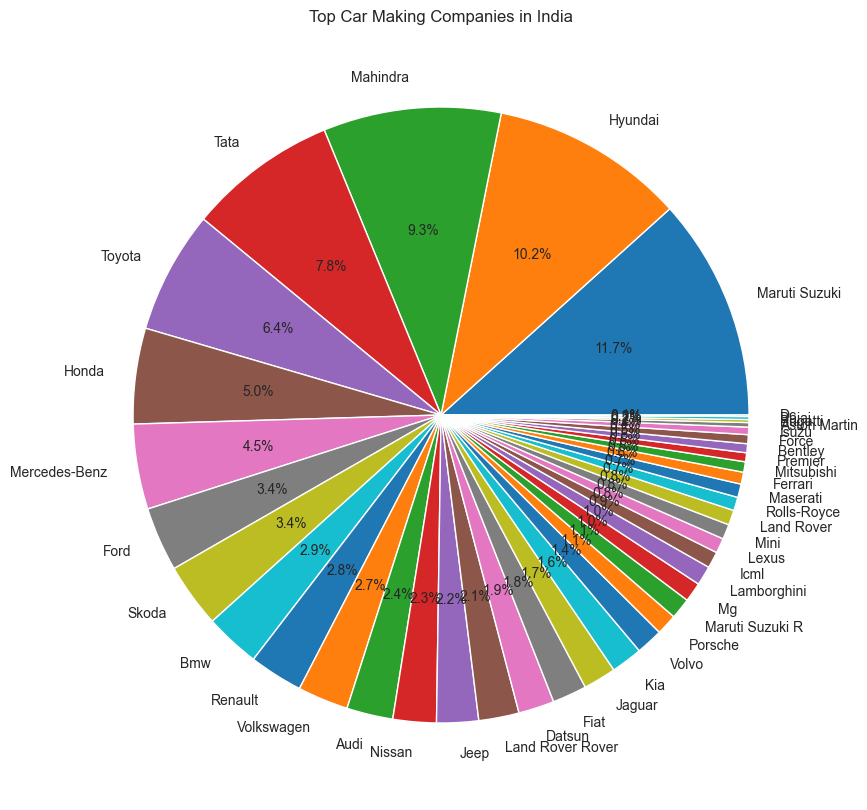

In [131]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie',autopct='%1.1f%%')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

Count of cars with the fuel type

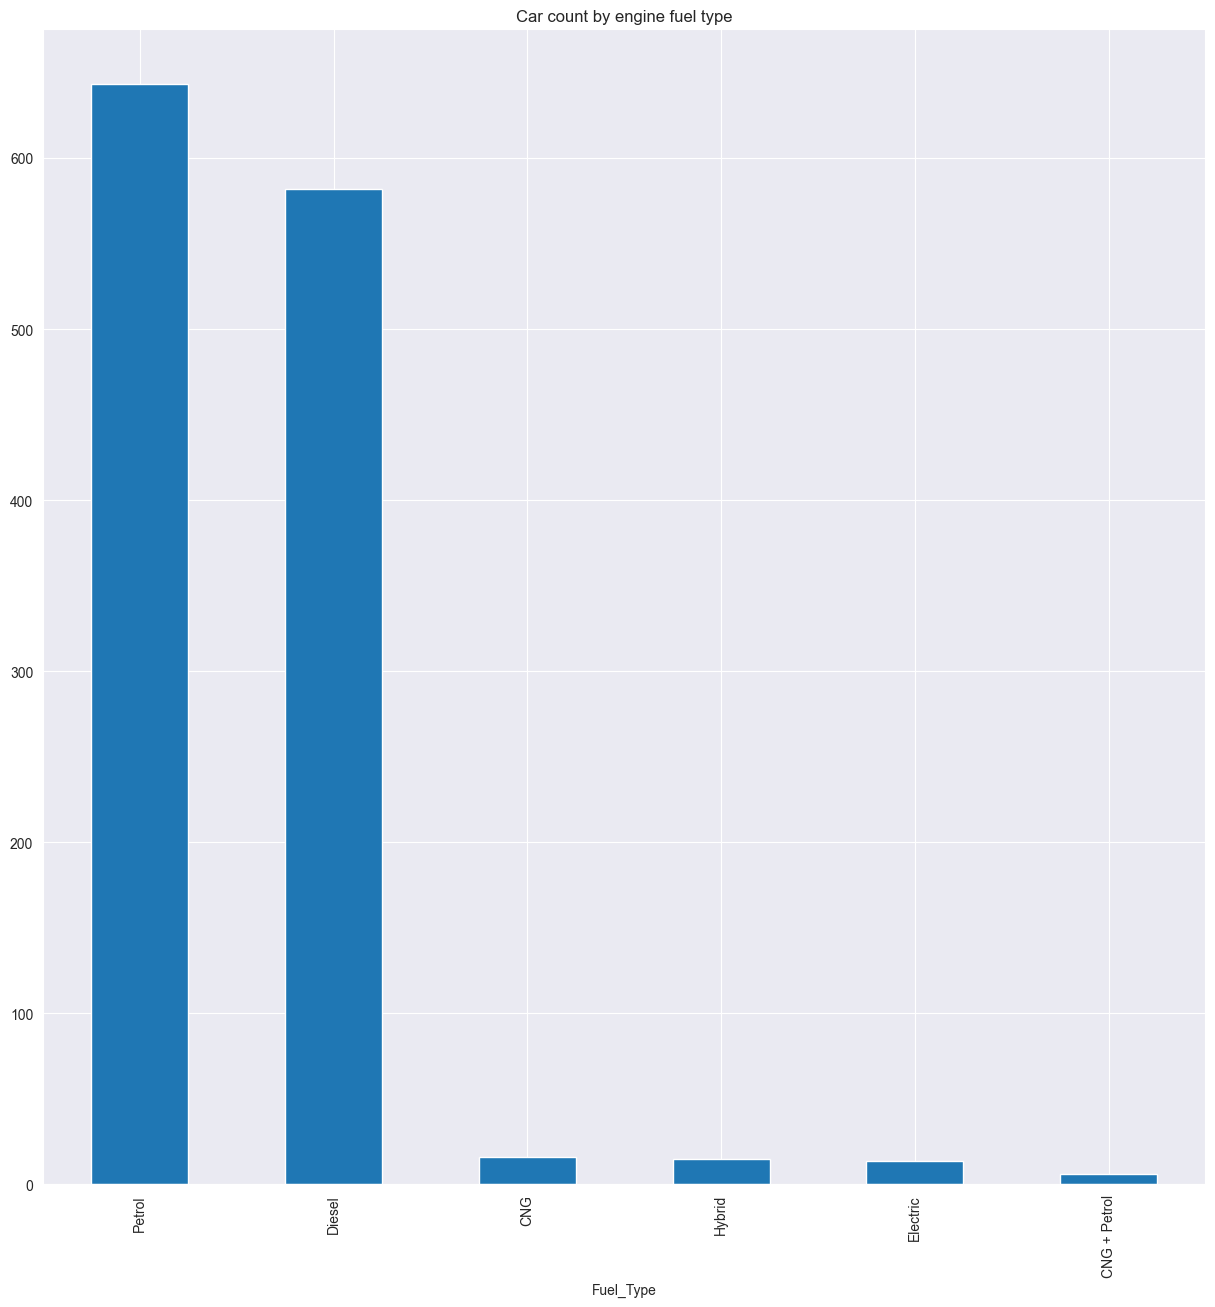

In [125]:
fig = plt.figure(figsize=(15,15))
ax = fig.subplots()
df['Fuel_Type'].value_counts().plot(ax=ax, kind='bar')
ax.set_ylabel('')
ax.set_title('Car count by engine fuel type')
plt.show()

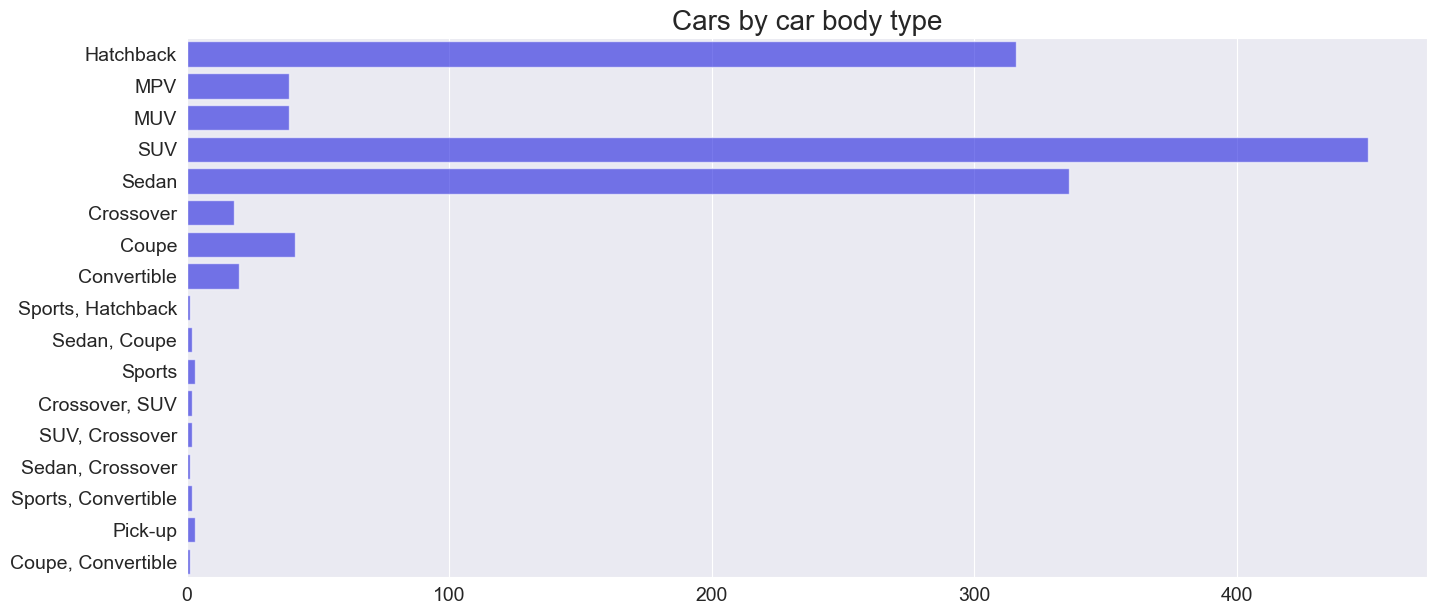

In [132]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='blue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

In [137]:
df_clean = df[['Length', 'Width', 'Fuel_Tank_Capacity', 'Displacement', 'Ex-Showroom_Price','Cylinders','City_Mileage','Highway_Mileage','ARAI_Certified_Mileage','Seating_Capacity']]
df_clean

Length  Width  Fuel_Tank_Capacity  Displacement  Ex-Showroom_Price  \
0     3164 mm   1750                  24           624             292667   
1     3164 mm   1750                  24           624             236447   
2     3164 mm   1750                  15           624             296661   
3     3164 mm   1750                  24           624             334768   
4     3164 mm   1750                  24           624             272223   
...       ...    ...                 ...           ...                ...   
1271  4440 mm   1695                  40          1498            1302000   
1272  4440 mm   1695                  40          1498            1421000   
1273  4440 mm   1695                  40          1497            1431000   
1274  4440 mm   1695                  40          1497            1201000   
1275  4900 mm   1875                  88          3200            6862560   

      Cylinders  City_Mileage  Highway_Mileage  ARAI_Certified_Mileage  \
0             2         23.60               24                   23.60   
1             2         23.60               24                   23.60   
2             2         23.60               24                   23.00   
3             2         23.60               24                   21.90   
4             2         23.60               24                   23.60   
...         ...           ...              ...                     ...   
1271          4         22.60              251                   25.10   
1272          4         22.60              251                   25.10   
1273          4         18.00               18                   22.60   
1274          4         14.30              164                   17.80   
1275          4          8.25             1156                   11.56   

      Seating_Capacity  
0                  4.0  
1                  4.0  
2                  4.0  
3                  4.0  
4                  4.0  
...                ...  
1271               5.0  
1272               5.0  
1273               5.0  
1274               5.0  
1275               7.0  

[1276 rows x 10 columns]

In [139]:
df_clean = df_clean.replace(r"\s|[a-zA-z|,|.]", "", regex=True).dropna().astype('int64')

In [184]:
df['Length'] = df['Length'].replace(r"\s|[a-zA-z|,|.]", "", regex=True).astype('int64')

<Axes: >

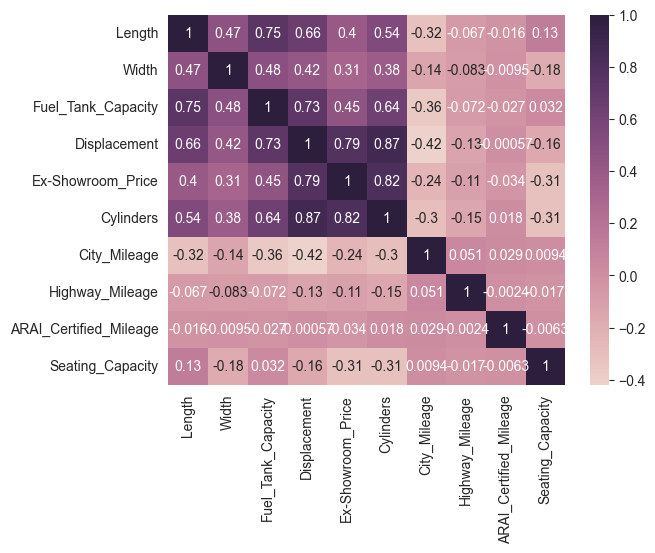

In [140]:
sns.heatmap(df_clean.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [149]:
bins = [0, 236447, 6862560, float('inf')]
labels = ['Affordable', 'Average', 'Expensive']
df['Price Category'] = pd.cut(df['Ex-Showroom_Price'], bins=bins, labels=labels)

In [150]:
grouped_df = df.groupby(['Make', 'Price Category']).size().unstack(fill_value=0)

C:\Users\sanja\AppData\Local\Temp\ipykernel_4268\3851025843.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Make', 'Price Category']).size().unstack(fill_value=0)


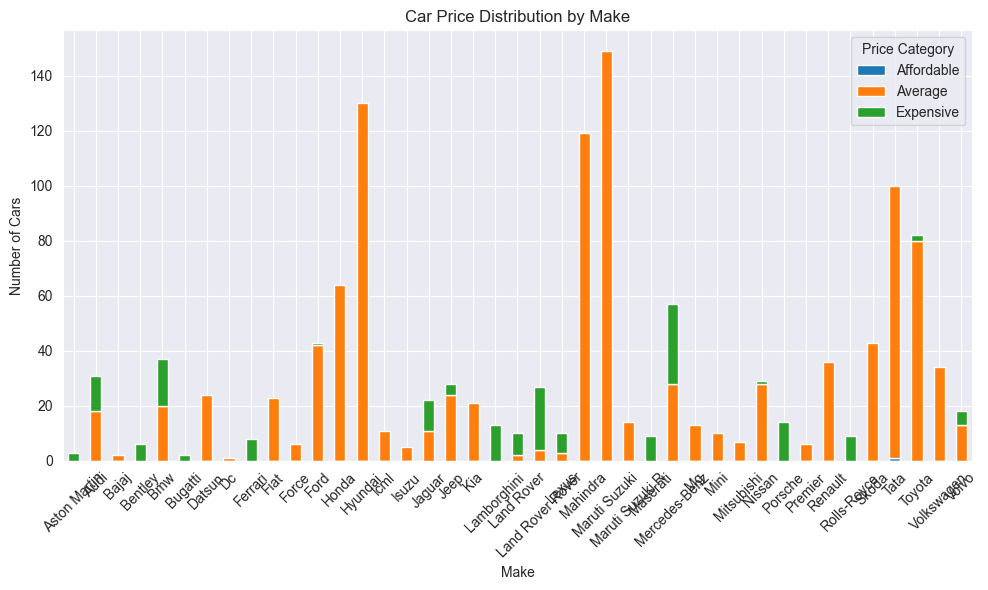

In [151]:
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Car Price Distribution by Make')
ax.set_xlabel('Make')
ax.set_ylabel('Number of Cars')
ax.legend(title='Price Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [147]:
df['Ex-Showroom_Price'].max

<bound method Series.max of 0        292667
1        236447
2        296661
3        334768
4        272223
         ...   
1271    1302000
1272    1421000
1273    1431000
1274    1201000
1275    6862560
Name: Ex-Showroom_Price, Length: 1276, dtype: int64>

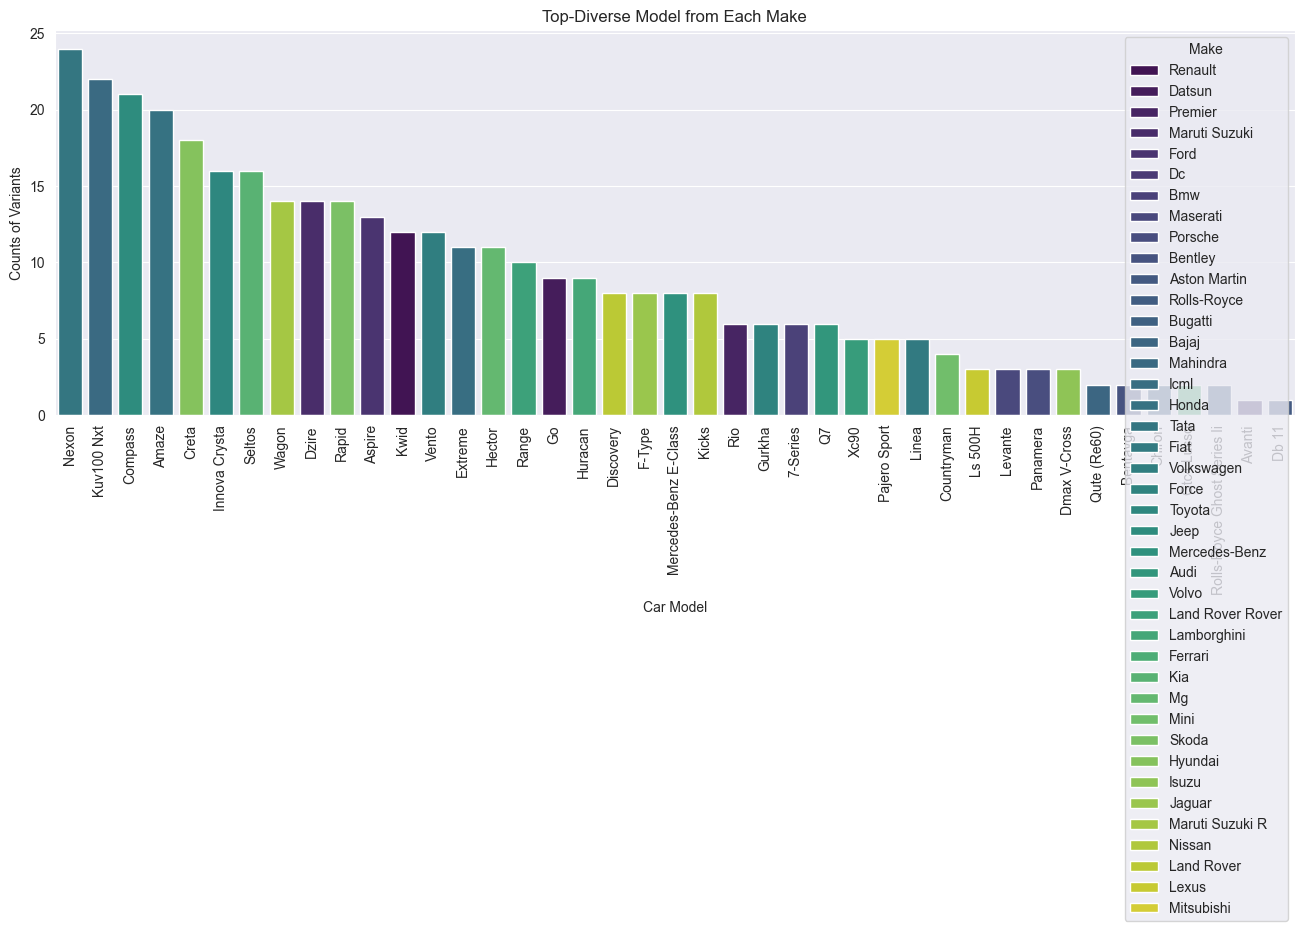

In [161]:
fig, axes = plt.subplots(figsize=(16, 5))
top_models_by_make = df.groupby('Make')['Model'].apply(lambda x: x.value_counts().idxmax())

# Filter the car DataFrame to include only the rows corresponding to the top-selling models
top_diverse_cars = df[df['Model'].isin(top_models_by_make)]

# Second subplot for top-diverse models
sns.countplot(data=top_diverse_cars, x='Model', order=top_diverse_cars['Model'].value_counts().index, palette='viridis', ax=axes, hue='Make')
axes.set_title('Top-Diverse Model from Each Make')
axes.set_xlabel('Car Model')
axes.set_ylabel('Counts of Variants')
axes.tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlapping
plt.show()

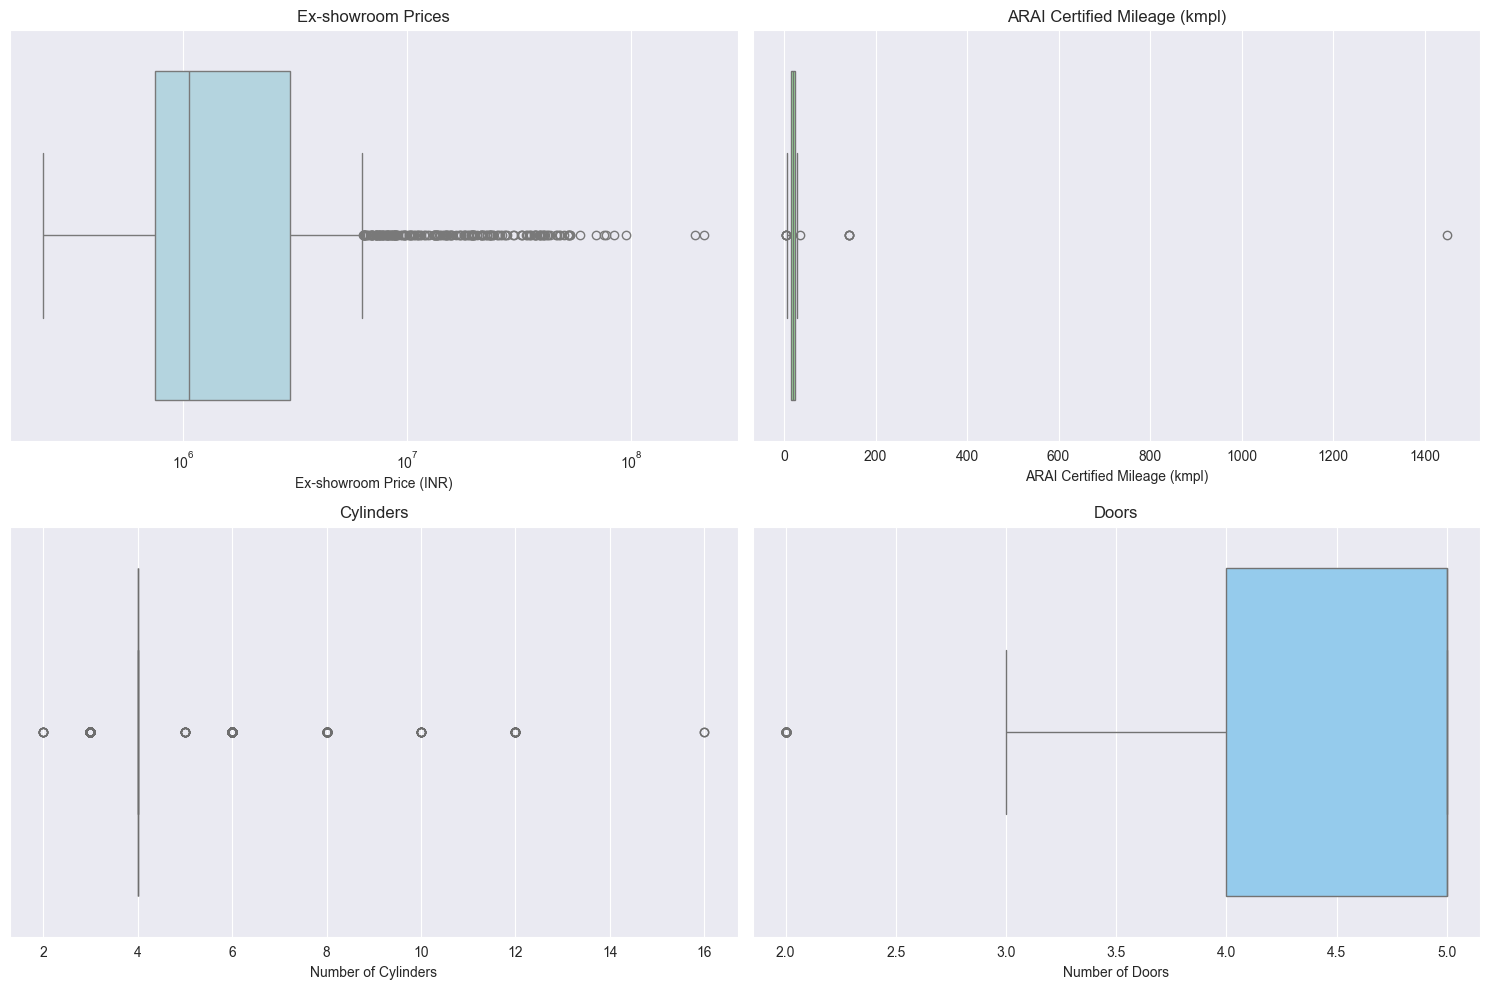

In [168]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plot for ex-showroom prices
sns.boxplot(data=df, x='Ex-Showroom_Price', color='lightblue', ax=axes[0, 0])
axes[0, 0].set_xscale('log')
axes[0, 0].set_title('Ex-showroom Prices')
axes[0, 0].set_xlabel('Ex-showroom Price (INR)')

# Box plot for ARAI certified mileage
sns.boxplot(data=df, x='ARAI_Certified_Mileage', color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('ARAI Certified Mileage (kmpl)')
axes[0, 1].set_xlabel('ARAI Certified Mileage (kmpl)')

# Box plot for cylinders
sns.boxplot(data=df, x='Cylinders', color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title('Cylinders')
axes[1, 0].set_xlabel('Number of Cylinders')

# Box plot for doors
sns.boxplot(data=df, x='Doors', color='lightskyblue', ax=axes[1, 1])
axes[1, 1].set_title('Doors')
axes[1, 1].set_xlabel('Number of Doors')

# Adjust layout
plt.tight_layout()
plt.show()

## Count Plots

C:\Users\sanja\AppData\Local\Temp\ipykernel_4268\2281566960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fuel_Type', ax=axes[0], palette='viridis', order=df['Fuel_Type'].value_counts().index, width=0.5)
C:\Users\sanja\AppData\Local\Temp\ipykernel_4268\2281566960.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', ax=axes[1], palette='viridis', order=df['Type'].value_counts().index, width=0.5)


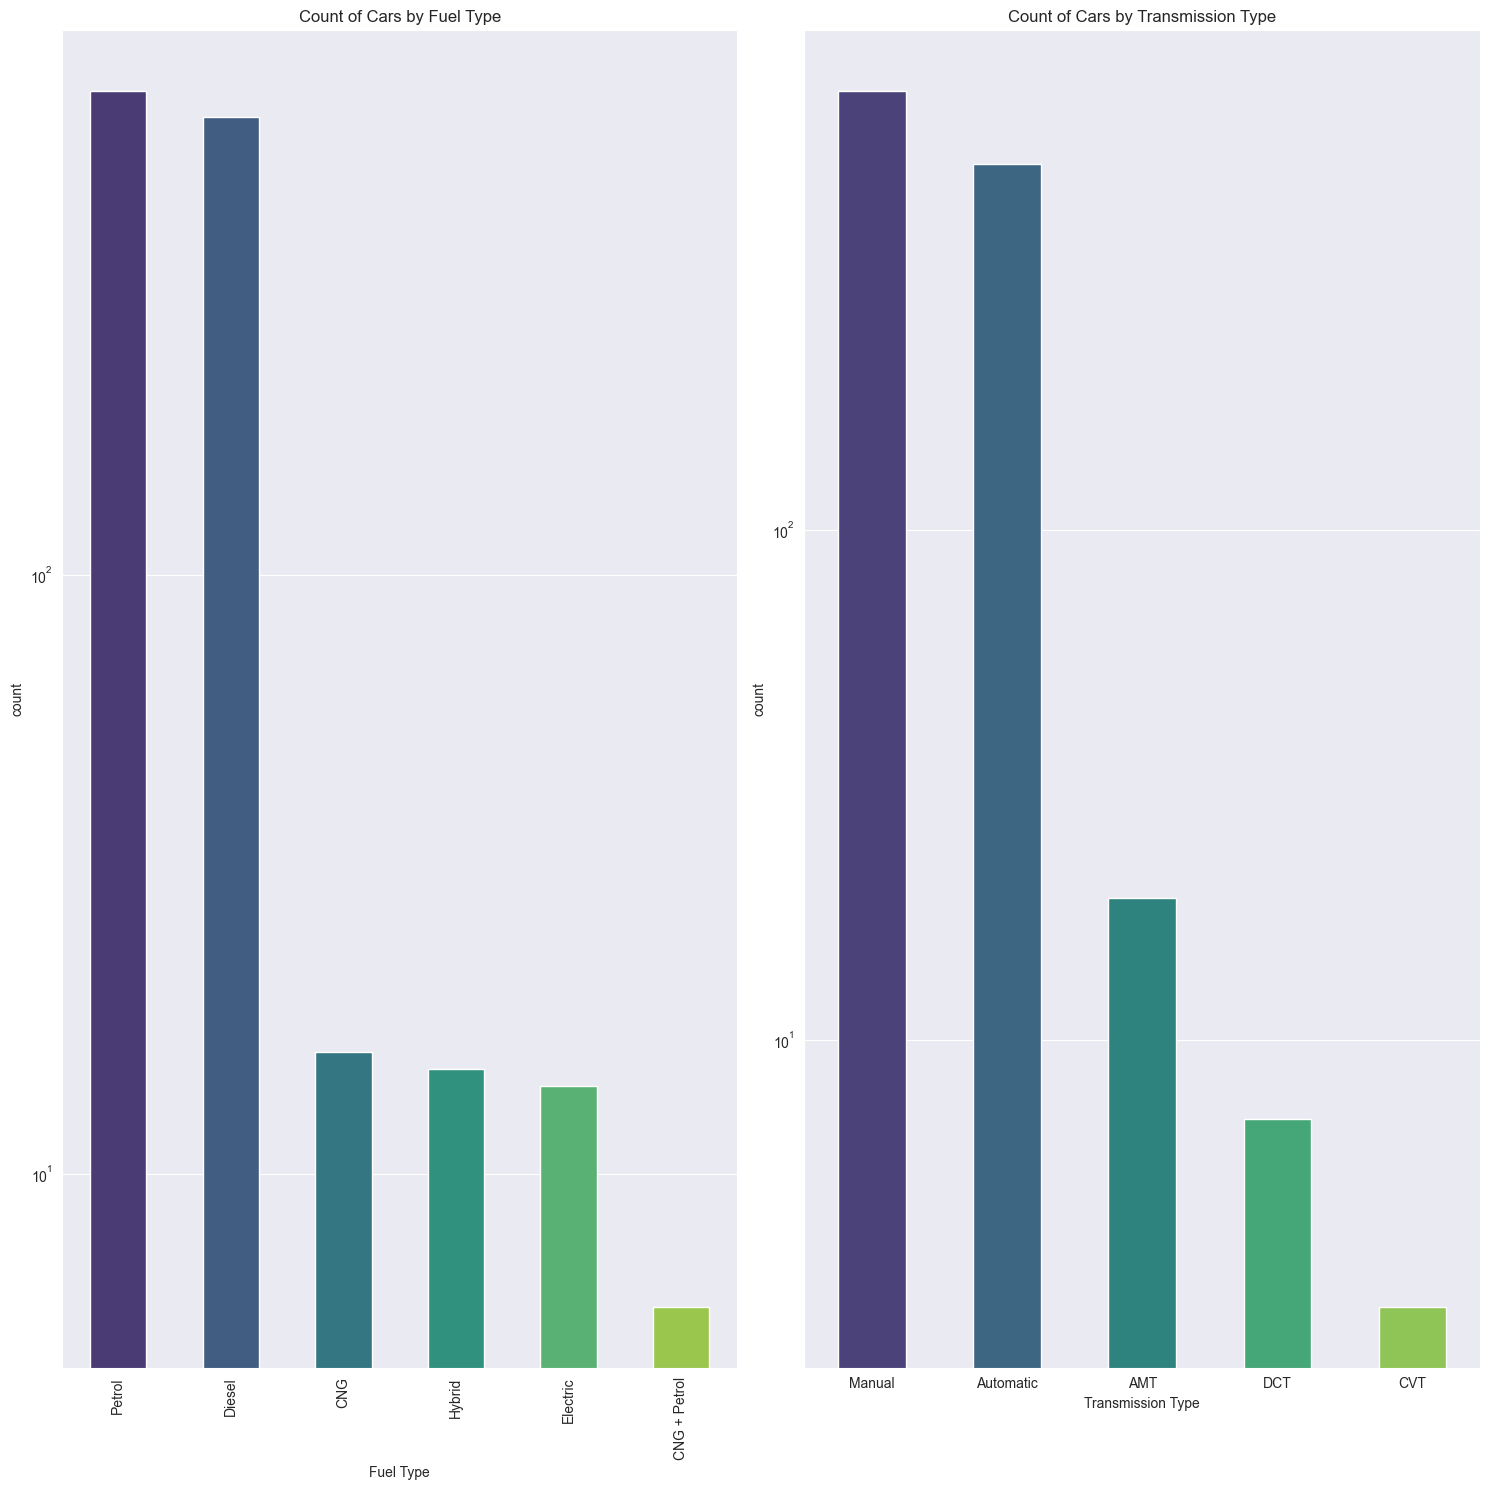

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))

# First subplot for Fuel Type
sns.countplot(data=df, x='Fuel_Type', ax=axes[0], palette='viridis', order=df['Fuel_Type'].value_counts().index, width=0.5)
axes[0].set_title('Count of Cars by Fuel Type')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('Fuel Type')
axes[0].set_yscale('log')

# Second subplot for Transmission Type
sns.countplot(data=df, x='Type', ax=axes[1], palette='viridis', order=df['Type'].value_counts().index, width=0.5)
axes[1].set_title('Count of Cars by Transmission Type')
axes[1].set_xlabel('Transmission Type')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


## **Data Vizualization: Bivariate**

## **Pair Plots**

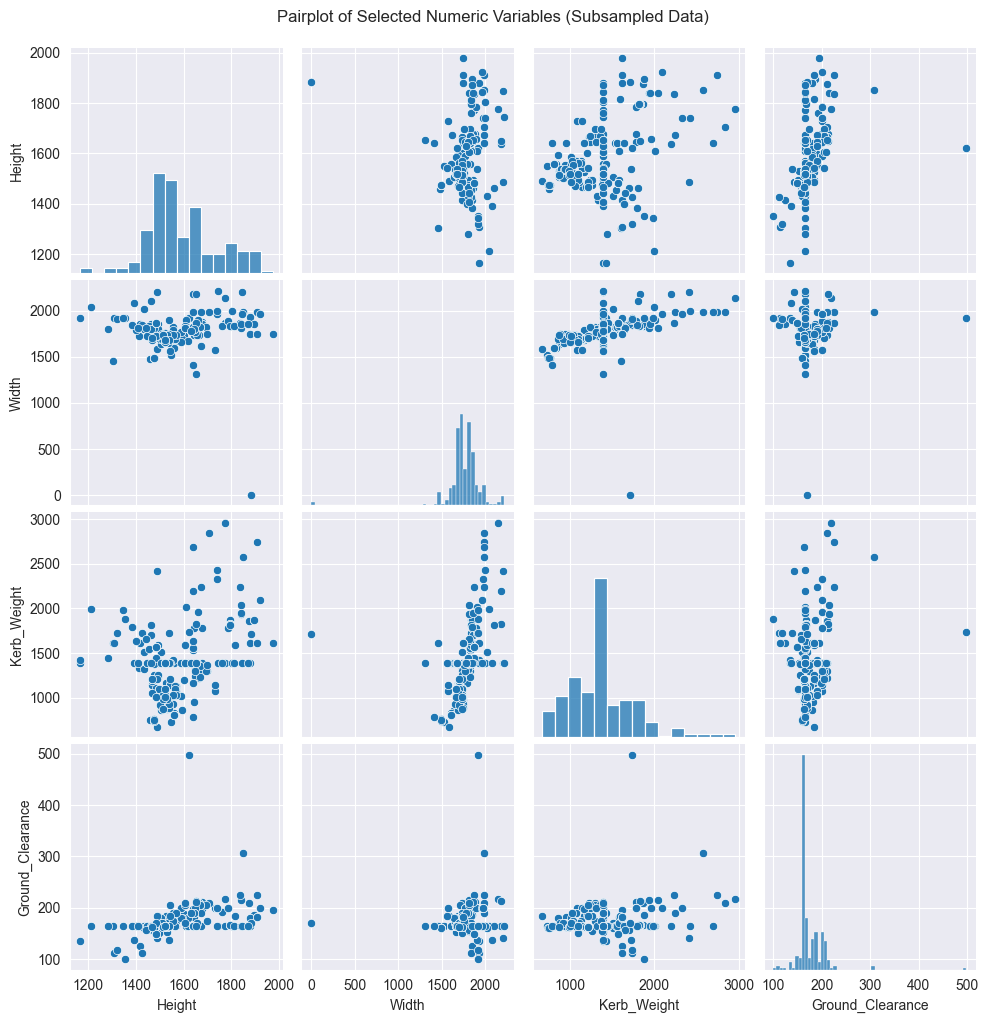

In [180]:
# Pairplot for selected numeric variables
selected_numeric_variables = ['Height', 'Length', 'Width', 'Kerb_Weight', 'Ground_Clearance']
# Subsample the data
subsampled_data = df.sample(frac=0.2, random_state=42)

# Pairplot for selected numeric variables with subsampled data
sns.pairplot(subsampled_data[selected_numeric_variables])
plt.suptitle('Pairplot of Selected Numeric Variables (Subsampled Data)', y=1.02)
plt.show()

## **Heatmaps**

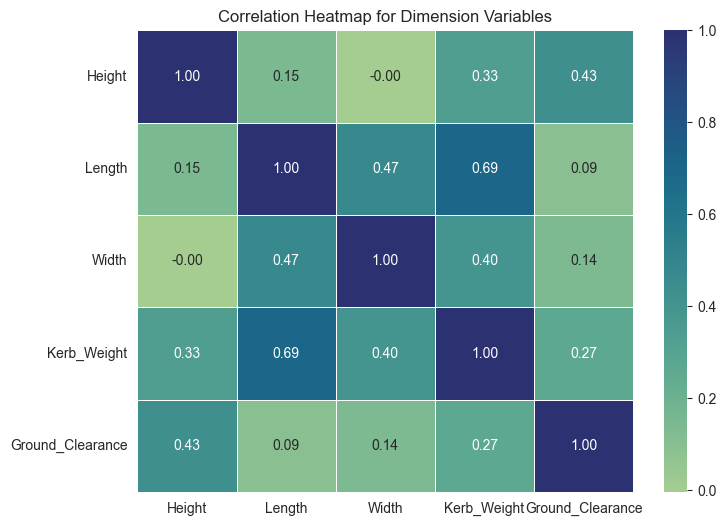

In [185]:
# Select the dimensions and calculate the correlation matrix
dimension_subset = df[['Height', 'Length', 'Width', 'Kerb_Weight', 'Ground_Clearance']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dimension_subset, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Dimension Variables')
plt.show()

In [191]:
import plotly.express as px

In [193]:
sorted_fuel_types = sorted(df['Fuel_Type'].unique(), reverse=True)

fig = px.bar(df, x='Fuel_Type', color='Price Category', barmode='stack',
             category_orders={'Fuel_Type': sorted_fuel_types},
             labels={'Fuel_Type': 'Fuel Type', 'Price_Segment': 'Price Segment'},
             title='Price Segment Distribution by Fuel Type')

# Update layout with log scale for y-axis
fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Count (log scale)', legend_title='Price Segment', yaxis_type="log")

# Sort bars in decreasing order by total count
fig.update_xaxes(categoryorder='total descending')

fig.show()
